In [ ]:
# zillow data scratchpad for regression-project

In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.preprocessing import PolynomialFeatures

from acquire import get_zillow_data

# Acquire Zillow Data

In [2]:
# getting my zillow data using my function 'get_zillow_data' from my acquire file
df = get_zillow_data()

In [3]:
df.head() # check_yo_head

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,transactiondate
0,14634203,2026522,1.0,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,289445.0,2016.0,213516.0,3490.16,NaN,NaN,6.059001e+13,625,-0.061973,2017-08-04
1,11721753,616260,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,205123.0,2016.0,163175.0,2627.48,NaN,NaN,6.037220e+13,1018,0.017785,2017-07-21
2,11289917,2061546,1.0,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,1248,-0.362001,2017-06-23
3,11637029,2554497,1.0,NaN,NaN,2.0,3.0,NaN,9.0,2.0,...,810694.0,2016.0,554156.0,9407.01,Y,13.0,6.037701e+13,1734,-0.093399,2017-07-28
4,11705026,1834372,NaN,NaN,NaN,1.0,2.0,NaN,6.0,1.0,...,35606.0,2016.0,23624.0,543.69,NaN,NaN,6.037232e+13,1772,-0.146056,2017-06-30


In [4]:
# taking a look at the data info
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38622 entries, 0 to 38621
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      38622 non-null  int64  
 1   id                            38622 non-null  int64  
 2   airconditioningtypeid         12224 non-null  float64
 3   architecturalstyletypeid      101 non-null    float64
 4   basementsqft                  27 non-null     float64
 5   bathroomcnt                   38622 non-null  float64
 6   bedroomcnt                    38622 non-null  float64
 7   buildingclasstypeid           0 non-null      float64
 8   buildingqualitytypeid         23706 non-null  float64
 9   calculatedbathnbr             38463 non-null  float64
 10  decktypeid                    333 non-null    float64
 11  finishedfloor1squarefeet      3339 non-null   float64
 12  calculatedfinishedsquarefeet  38509 non-null  float64
 13  f

In [5]:
# looking at all the columns in the data
df.columns

Index(['parcelid', 'id', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

In [6]:
# looking at the number of rows and columns in the zillow data
df.shape

(38622, 62)

In [7]:
# some quick stats on the zillow data
df.describe()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id.1,logerror
count,3.862200e+04,3.862200e+04,12224.000000,101.000000,27.000000,38622.000000,38622.000000,0.0,23706.000000,38463.000000,...,84.0,3.857000e+04,3.862100e+04,38622.0,3.862100e+04,38621.000000,1268.000000,3.847800e+04,38622.000000,38622.000000
mean,1.310495e+07,1.500394e+06,1.900196,7.564356,639.703704,2.273743,3.010512,NaN,6.610394,2.282739,...,1.0,1.907161e+05,4.965779e+05,2016.0,3.061136e+05,6042.953623,14.070978,6.050206e+13,52116.933794,0.015917
std,3.700741e+06,8.591808e+05,3.112632,3.232386,445.977907,0.950588,1.029506,NaN,1.694360,0.941702,...,0.0,2.384221e+05,6.326909e+05,0.0,4.583442e+05,7366.777380,1.482764,2.126099e+11,12046.770714,0.172150
min,1.071186e+07,3.490000e+02,1.000000,2.000000,100.000000,0.000000,0.000000,NaN,1.000000,1.000000,...,1.0,1.290000e+02,1.000000e+03,2016.0,1.000000e+03,19.920000,7.000000,6.037101e+13,625.000000,-4.453964
25%,1.154805e+07,7.599932e+05,1.000000,7.000000,349.000000,2.000000,2.000000,NaN,6.000000,2.000000,...,1.0,8.451250e+04,2.090510e+05,2016.0,8.702300e+04,2720.440000,14.000000,6.037400e+13,41836.250000,-0.023433
50%,1.260418e+07,1.507182e+06,1.000000,7.000000,604.000000,2.000000,3.000000,NaN,7.000000,2.000000,...,1.0,1.369250e+05,3.635160e+05,2016.0,2.080000e+05,4464.540000,15.000000,6.037651e+13,52156.500000,0.006802
75%,1.429905e+07,2.242966e+06,1.000000,7.000000,743.000000,3.000000,4.000000,NaN,8.000000,3.000000,...,1.0,2.199940e+05,5.778040e+05,2016.0,3.761050e+05,6984.240000,15.000000,6.059052e+13,62495.750000,0.037605
max,1.676878e+08,2.982274e+06,13.000000,21.000000,1969.000000,11.000000,12.000000,NaN,12.000000,11.000000,...,1.0,1.142179e+07,2.385837e+07,2016.0,1.635060e+07,276797.830000,15.000000,6.111009e+13,72844.000000,3.175688


### Acquire Takeaways
- way too many columns (62) in the zillow data that are not needed
- will need to either drop columns or jsut select the needed columns to use for the project
- will need to also rename columns in order to make them eaiser to read and use
- will need to drop remaining null values in the zillow data

# Prep

In [8]:
# imports
from acquire import clean_zillow

In [9]:
# getting my clean data function 'clean_zillow' from my acquire file
df = clean_zillow(df)

In [10]:
df.head() # check_yo_head

,sqft,baths,beds,tax_value,year_built,tax_amount,fips
parcel_id,,,,,,,
14634203,1125.0,2.0,3.0,289445.0,1974.0,3490.16,6059.0
11721753,1316.0,2.0,3.0,205123.0,1923.0,2627.48,6037.0
11289917,1458.0,2.0,3.0,136104.0,1970.0,2319.90,6037.0
11637029,1766.0,2.0,3.0,810694.0,1980.0,9407.01,6037.0
11705026,1421.0,1.0,2.0,35606.0,1911.0,543.69,6037.0


In [11]:
# taking a look at rows and columns after cleaning data, I now have 7 columns 
df.shape

(38479, 7)

In [12]:
# some quick stats about the clean zillow data
df.describe()

,sqft,baths,beds,tax_value,year_built,tax_amount,fips
count,38479.000000,38479.000000,38479.000000,3.847900e+04,38479.000000,38479.000000,38479.000000
mean,1762.186959,2.279984,3.019127,4.952888e+05,1969.515164,6027.357882,6049.861405
std,927.044148,0.943301,1.017722,6.288941e+05,23.055600,7313.158672,21.376526
min,240.000000,0.000000,0.000000,1.000000e+03,1878.000000,19.920000,6037.000000
25%,1174.000000,2.000000,2.000000,2.091495e+05,1954.000000,2723.925000,6037.000000
50%,1525.000000,2.000000,3.000000,3.637150e+05,1971.000000,4465.360000,6037.000000
75%,2082.000000,3.000000,4.000000,5.771945e+05,1987.000000,6980.920000,6059.000000
max,17245.000000,11.000000,12.000000,2.385837e+07,2016.000000,276797.830000,6111.000000


In [13]:
# checking for nulls in my clean data, will need to drop unneccesary nulls
df.isna().sum()

sqft          0
baths         0
beds          0
tax_value     0
year_built    0
tax_amount    0
fips          0
dtype: int64

In [16]:
# importing my functions from my prepare file to use on zillow data
from prepare import remove_outlier, train_validate_test, get_object_cols, get_numeric_X_cols, min_max_scale

In [17]:
# using my 'remove_outlier' function
df = remove_outlier(df)

In [18]:
df.head() # check_yo_head

,sqft,baths,beds,tax_value,year_built,tax_amount,fips
parcel_id,,,,,,,
14634203,1125.0,2.0,3.0,289445.0,1974.0,3490.16,6059.0
11721753,1316.0,2.0,3.0,205123.0,1923.0,2627.48,6037.0
11289917,1458.0,2.0,3.0,136104.0,1970.0,2319.90,6037.0
11637029,1766.0,2.0,3.0,810694.0,1980.0,9407.01,6037.0
11705026,1421.0,1.0,2.0,35606.0,1911.0,543.69,6037.0


In [19]:
# looking at the columns and rows of my data
df.shape

(37931, 7)

In [23]:
# getting some info on my data, I no nulss and my data types are float64
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37931 entries, 14634203 to 10713993
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sqft        37931 non-null  float64
 1   baths       37931 non-null  float64
 2   beds        37931 non-null  float64
 3   tax_value   37931 non-null  float64
 4   year_built  37931 non-null  float64
 5   tax_amount  37931 non-null  float64
 6   fips        37931 non-null  float64
dtypes: float64(7)
memory usage: 2.3 MB


In [21]:
# some quick stats on my data
df.describe()

,sqft,baths,beds,tax_value,year_built,tax_amount,fips
count,37931.000000,37931.000000,37931.000000,3.793100e+04,37931.000000,37931.000000,37931.000000
mean,1718.728349,2.243732,2.999631,4.437613e+05,1969.396325,5436.697166,6049.943555
std,816.846959,0.878924,0.997571,3.571448e+05,22.938043,4189.410291,21.452931
min,240.000000,0.000000,0.000000,1.000000e+03,1878.000000,19.920000,6037.000000
25%,1168.000000,2.000000,2.000000,2.068960e+05,1954.000000,2697.940000,6037.000000
50%,1512.000000,2.000000,3.000000,3.588800e+05,1971.000000,4416.660000,6037.000000
75%,2049.000000,3.000000,4.000000,5.634630e+05,1987.000000,6811.375000,6059.000000
max,11020.000000,10.000000,11.000000,2.381729e+06,2016.000000,61992.630000,6111.000000


In [22]:
# double checking for nulls in my data
df.isna().sum()

sqft          0
baths         0
beds          0
tax_value     0
year_built    0
tax_amount    0
fips          0
dtype: int64

<AxesSubplot:>

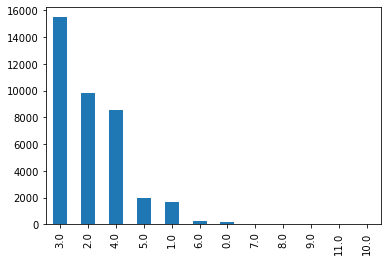

In [28]:
# visualizing the amount of bedrooms 'beds' in my data using a bar chart
# 3 bedrooms is the most popular
df.beds.value_counts().plot.bar()

<AxesSubplot:>

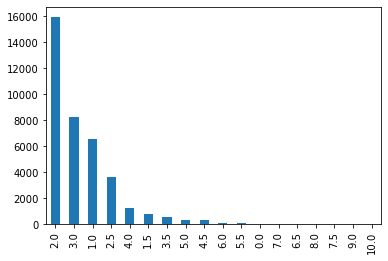

In [29]:
# visualizing the amount of bathrooms 'baths' in my data
# 2 bathrooms is the most popular
df.baths.value_counts().plot.bar()

In [30]:
# setting my target to 'tax_value'
target = 'tax_value'

In [31]:
# splitting up my data using the function in my prepare.py
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(df, target)

In [32]:
# taking a look at my train data shape, should be the largest amount of data
train.shape

(21240, 7)

In [33]:
# taking a look at my validate data shape, should be less than the train data but larger than the test data
validate.shape

(9104, 7)

In [34]:
# taking a look at my test data shape, should be the smallest amount of data
test.shape

(7587, 7)

In [35]:
# assigning my function to 'obj_cols'
obj_cols = get_object_cols(df)

In [36]:
# assigning my funtction to 'num_cols'
num_cols = get_numeric_X_cols(X_train, obj_cols)

In [37]:
# scaling the data
X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scale(X_train, X_validate, X_test, num_cols)

In [39]:
# looking at the scaled data
X_train_scaled

,sqft,baths,beds,year_built,tax_amount,fips
11110300,0.153646,0.2,0.3,0.642336,0.101328,0.000000
14263136,0.092689,0.2,0.3,0.583942,0.086019,0.297297
13031301,0.184079,0.3,0.5,0.627737,0.060544,0.000000
12576144,0.234459,0.4,0.7,0.598540,0.089960,0.000000
12138584,0.105771,0.3,0.2,0.700730,0.025538,0.000000
...,...,...,...,...,...,...
12644972,0.109946,0.2,0.3,0.335766,0.104140,0.000000
12590362,0.090833,0.2,0.2,0.744526,0.068437,0.000000
11326265,0.184357,0.3,0.5,0.832117,0.117297,0.000000
13909284,0.079235,0.2,0.3,0.693431,0.039300,0.297297


In [41]:
# using the required columns for the zillow project and assigning them to 'cols'
cols = ['sqft', 'beds', 'baths', 'tax_value']

In [42]:
plot_variable_pairs(train, cols)

NameError: name 'plot_variable_pairs' is not defined